In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [19]:
df = pd.read_csv('../input/train.csv')
test=pd.read_csv('../input/test.csv')

In [20]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [21]:
df['Gender']=df['Gender'].astype('category')
df['Age']=df['Age'].astype('category')
df['Occupation']=df['Occupation'].astype('category')
df['City_Category']=df['City_Category'].astype('category')
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype('category')
df['Marital_Status']=df['Marital_Status'].astype('category')
test['Gender']=test['Gender'].astype('category')
test['Age']=test['Age'].astype('category')
test['Occupation']=test['Occupation'].astype('category')
test['City_Category']=test['City_Category'].astype('category')
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].astype('category')
test['Marital_Status']=test['Marital_Status'].astype('category')

In [22]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode())
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode())

In [23]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [24]:
test['Product_Category_2']=test['Product_Category_2'].fillna(test['Product_Category_2'].mode())
test['Product_Category_3']=test['Product_Category_3'].fillna(test['Product_Category_3'].mode())

In [25]:
df=df.drop('User_ID',axis=1)
df=df.drop('Product_ID',axis=1)
test=test.drop('User_ID',axis=1)
test=test.drop('Product_ID',axis=1)
df=pd.get_dummies(df,drop_first=True)
test=pd.get_dummies(test,drop_first=True)

In [26]:
df.shape

(550068, 38)

In [27]:
test.shape

(233599, 37)

In [28]:
df.columns

Index(['Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase', 'Gender_M', 'Age_18-25', 'Age_26-35', 'Age_36-45',
       'Age_46-50', 'Age_51-55', 'Age_55+', 'Occupation_1', 'Occupation_2',
       'Occupation_3', 'Occupation_4', 'Occupation_5', 'Occupation_6',
       'Occupation_7', 'Occupation_8', 'Occupation_9', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_20', 'City_Category_B', 'City_Category_C',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+',
       'Marital_Status_1'],
      dtype='object')

In [29]:
y=df[['Purchase']]
X=df.drop('Purchase',axis=1)

In [30]:
X.head()

,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,Occupation_18,Occupation_19,Occupation_20,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Marital_Status_1
0,3,8.0,16.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,6.0,14.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,12,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,12,14.0,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8,NaN,NaN,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [31]:
X, test = X.align(test,join='left',axis=1)

In [32]:
test.head()

,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,Occupation_18,Occupation_19,Occupation_20,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Marital_Status_1
0,1,11.0,16.0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
1,3,5.0,NaN,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,5,14.0,NaN,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
3,4,9.0,NaN,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
4,4,5.0,12.0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [33]:
from xgboost import XGBRegressor
regressor = XGBRegressor(learning_rate =0.1,
 n_estimators=500,
 max_depth=5,
 min_child_weight=6,
 gamma=0,
  reg_alpha=0.005,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 seed=27)

regressor.fit(X,y)

[05:10:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=6, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0.005, reg_lambda=1, scale_pos_weight=1, seed=27,
             silent=None, subsample=0.8, verbosity=1)

In [34]:
y_pred=regressor.predict(X)

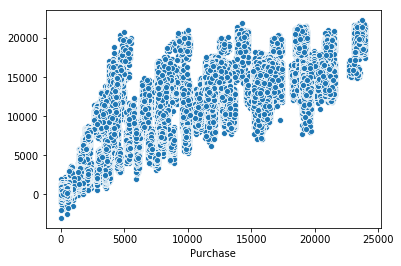

In [35]:
sns.scatterplot(x=y['Purchase'],y=y_pred)

In [36]:
from sklearn import metrics
metrics.r2_score(y,y_pred)

0.6762399592332246

In [37]:
result=pd.read_csv('../input/Sample_Submission.csv')

In [38]:
t=pd.read_csv('../input/test.csv')

In [39]:
result['User_ID']=t['User_ID']

In [40]:
result['Product_ID']=t['Product_ID']

In [41]:
result['Purchase']=regressor.predict(test)

In [42]:
result.to_csv("result.csv")

<a href="./result.csv"> Download File </a>

In [43]:
result.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,14507.539062
1,1000009,P00113442,10796.615234
2,1000010,P00288442,6210.027832
3,1000010,P00145342,2458.319336
4,1000011,P00053842,2727.824463
